In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = [[1, 30., 3],  [1, 40., 2],  [1, 50., 2],  [1, 60., 2],  [1, 70., 2],  [1, 80., 2],  [1, 90., 3], [1, 100., 2], [1, 110., 3], [1, 120., 2]]
y = [36., 40., 47., 55., 54., 59., 70., 72., 74., 82.]

X = np.array(X)
y = np.array(y)

In [3]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print("Веса модели:", w)

Веса модели: [20.45549133  0.50098266  0.37861272]


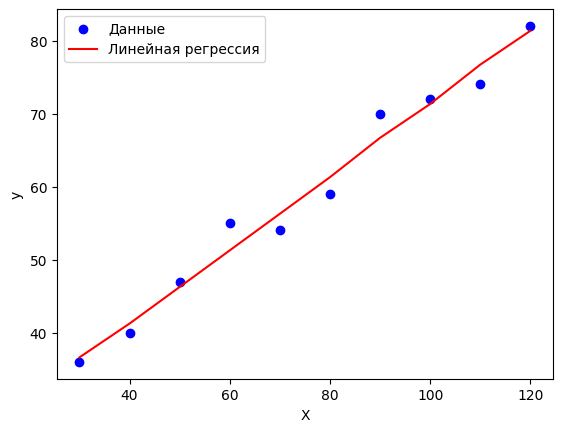

In [4]:
plt.scatter(X[:, 1], y, color='blue', label='Данные')
plt.plot(X[:, 1], w[0] + w[1] * X[:, 1] + (w[2] * X[:, 2]), color='red', label='Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
w[0] + w[1] * 50

np.float64(45.504624277456756)

Веса модели: [20.45549133  0.50098266  0.37861272]


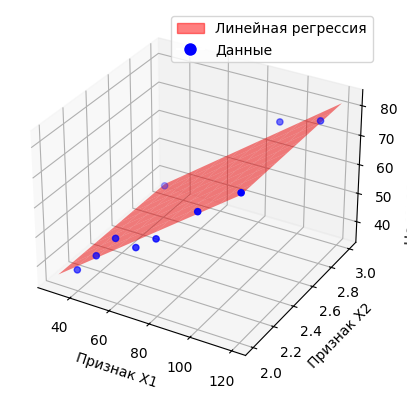

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # необходимо для 3D-графиков

# Исходные данные:
# Первый столбец матрицы X — единицы для свободного члена, второй и третий — признаки.
X = [
    [1, 30., 3],
    [1, 40., 2],
    [1, 50., 2],
    [1, 60., 2],
    [1, 70., 2],
    [1, 80., 2],
    [1, 90., 3],
    [1, 100., 2],
    [1, 110., 3],
    [1, 120., 2]
]
y = [36., 40., 47., 55., 54., 59., 70., 72., 74., 82.]

X = np.array(X)
y = np.array(y)

# Вычисление коэффициентов по нормальному уравнению:
# y = w0 + w1*x1 + w2*x2
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Веса модели:", w)

# Создание 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Трёхмерное рассеяние исходных данных:
# По оси X: первый признак (без учета столбца единиц), 
# по оси Y: второй признак, по оси Z: целевая переменная y.
ax.scatter(X[:, 1], X[:, 2], y, color='blue', label='Данные')

# Построение регрессионной плоскости:
# Создаем сетку значений для обоих признаков
x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x2_range = np.linspace(X[:, 2].min(), X[:, 2].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
# Вычисляем y для регрессионной плоскости: y = w0 + w1*x1 + w2*x2
y_plane = w[0] + w[1] * x1_grid + w[2] * x2_grid

# Отображение регрессионной плоскости (прозрачность для лучшей видимости точек)
ax.plot_surface(x1_grid, x2_grid, y_plane, color='red', alpha=0.5)

# Настройка подписей осей:
ax.set_xlabel('Признак X1')
ax.set_ylabel('Признак X2')
ax.set_zlabel('Целевая переменная y')

# Добавление легенды
# Для plot_surface legend напрямую не добавляется, поэтому создадим фиктивный объект:
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', edgecolor='red', alpha=0.5, label='Линейная регрессия'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Данные')]
ax.legend(handles=legend_elements)

plt.show()
